[[[ 67  81  32]
  [ 67  81  32]
  [ 67  81  32]
  ...
  [ 82 103  47]
  [ 82 103  47]
  [ 82 103  47]]

 [[ 68  82  33]
  [ 68  82  33]
  [ 68  82  33]
  ...
  [ 82 103  47]
  [ 82 103  47]
  [ 82 103  47]]

 [[ 69  83  34]
  [ 69  83  34]
  [ 69  83  34]
  ...
  [ 81 102  46]
  [ 81 102  46]
  [ 81 102  46]]

 ...

 [[ 87 114  21]
  [ 75 102   9]
  [ 73  99   8]
  ...
  [ 42  77  35]
  [ 39  74  32]
  [ 38  73  31]]

 [[ 74 100   9]
  [ 62  88   0]
  [ 60  86   0]
  ...
  [ 40  75  33]
  [ 38  73  31]
  [ 36  71  29]]

 [[ 60  86   0]
  [ 49  75   0]
  [ 49  75   0]
  ...
  [ 37  72  30]
  [ 34  69  27]
  [ 33  68  26]]]


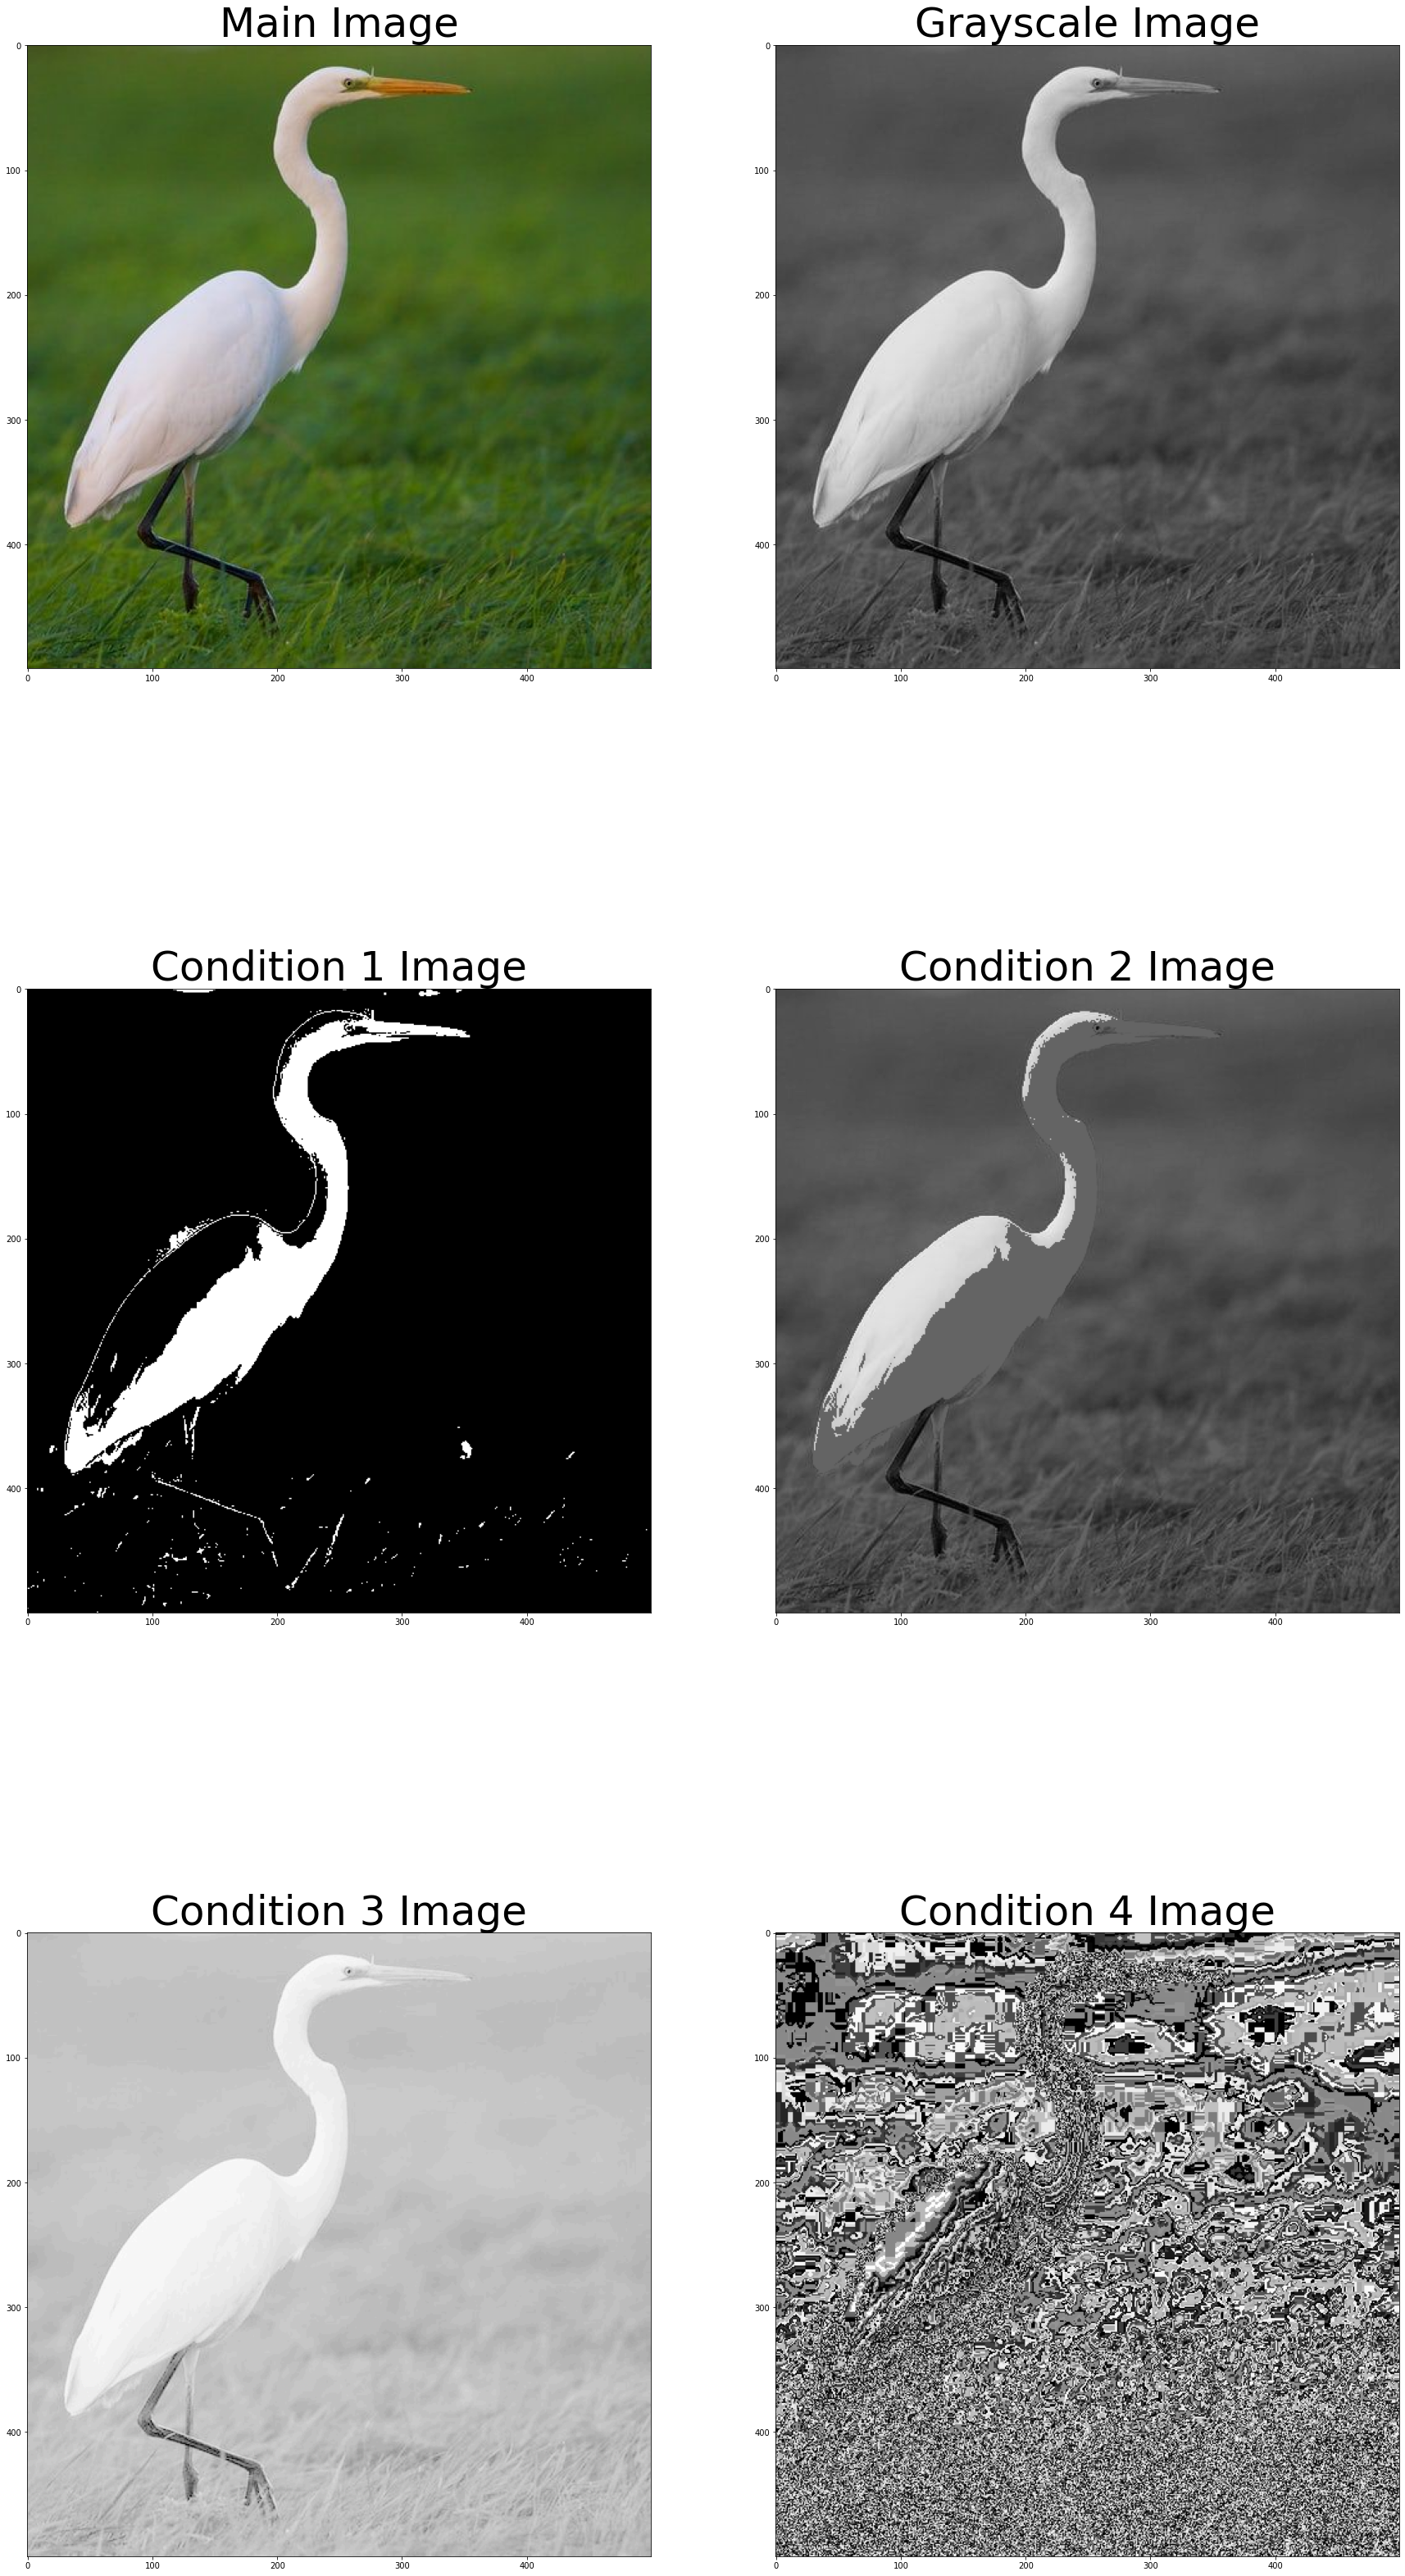

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import cv2
import math

img_path = './image.jpg'
image = plt.imread(img_path)
print(image)

T1 = 99
T2 = 201
c = 25
p = 3
epsilon = 0.0000001

plt.figure(figsize = (30, 60))

plt.subplot(3,2,1)
plt.title('Main Image', fontsize = 50)
plt.imshow(image)

plt.subplot(3,2,2)
plt.title('Grayscale Image', fontsize = 50)
grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_img, cmap = 'gray')

# print(grayscale_img.shape)
# print(grayscale_img)

width = grayscale_img.shape[1]
height = grayscale_img.shape[0]

grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
c1_img = grayscale_img
for i in range(0, height):
    for j in range(0, width):
        if c1_img[i][j] > T1 and c1_img[i][j] < T2:
            c1_img[i][j] = 100
        else:
            c1_img[i][j] = 10

grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
c2_img = grayscale_img
for i in range(0, height):
    for j in range(0, width):
        if c2_img[i][j] > T1 and c2_img[i][j] < T2:
            c2_img[i][j] = 100

grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
c3_img = grayscale_img
for i in range(0, height):
    for j in range(0, width):
        c3_img[i][j] = c*math.log(1+c3_img[i][j],10)
            
grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
c4_img = grayscale_img
for i in range(0, height):
    for j in range(0, width):
        c4_img[i][j] = c*(c4_img[i][j]+epsilon)**p

plt.subplot(3,2,3)
plt.title('Condition 1 Image', fontsize = 50)
plt.imshow(c1_img, cmap = 'gray')

plt.subplot(3,2,4)
plt.title('Condition 2 Image', fontsize = 50)
plt.imshow(c2_img, cmap = 'gray')

plt.subplot(3,2,5)
plt.title('Condition 3 Image', fontsize = 50)
plt.imshow(c3_img, cmap = 'gray')

plt.subplot(3,2,6)
plt.title('Condition 4 Image', fontsize = 50)
plt.imshow(c4_img, cmap = 'gray')

plt.show()
plt.savefig('processed-image.png')